Domain - IPL Dataset
Created by: Shreenidhi Kulkarni | 2348455
Created Date: 01.04.2024
Edited Dates: 01.04.2024


##**Lab Exercise 6 - Multi Dimensional Scaling (MDS)**

In [ ]:
#**1. Importing Libraries**
* numpy - for numerical, array, matrices (Linear Algebra) processing
* pandas - for loading and processing datasets
* matplotlib.pyplot - For visualisation
* Saeborn - for statistical graph
* scipy.stats  use a variety of statistical functions

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# Reading the csv files
df = pd.read_csv("/content/matches.csv")
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
# Display the first few rows of the dataframe
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
# Display the last few rows of the dataframe
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
# Get the dimensions of the dataframe (number of rows, number of columns)
df.shape

(756, 18)

In [ ]:
# Get the column names of the dataframe
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
# Get the data types of each column in the dataframe
df.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [ ]:
# Count the number of missing values in each column of the dataframe
df.isnull().count()

id                 756
season             756
city               756
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             756
win_by_runs        756
win_by_wickets     756
player_of_match    756
venue              756
umpire1            756
umpire2            756
umpire3            756
dtype: int64

In [ ]:
# Basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17

In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

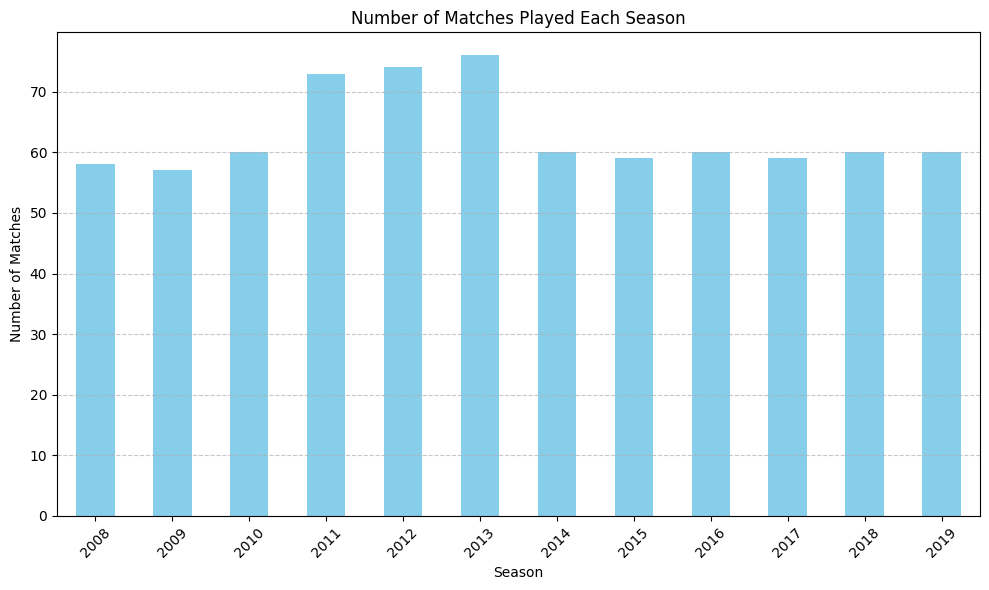

In [ ]:
# Temporal analysis: Number of matches played each season
matches_per_season = df['season'].value_counts().sort_index()

# Plotting temporal analysis
plt.figure(figsize=(10, 6))
matches_per_season.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation Matrix:                        id    season  dl_applied  win_by_runs  win_by_wickets
id              1.000000  0.668304   -0.011658    -0.039403       -0.012239
season          0.668304  1.000000   -0.001116    -0.037529       -0.009379
dl_applied     -0.011658 -0.001116    1.000000    -0.016349       -0.011631
win_by_runs    -0.039403 -0.037529   -0.016349     1.000000       -0.560420
win_by_wickets -0.012239 -0.009379   -0.011631    -0.560420        1.000000



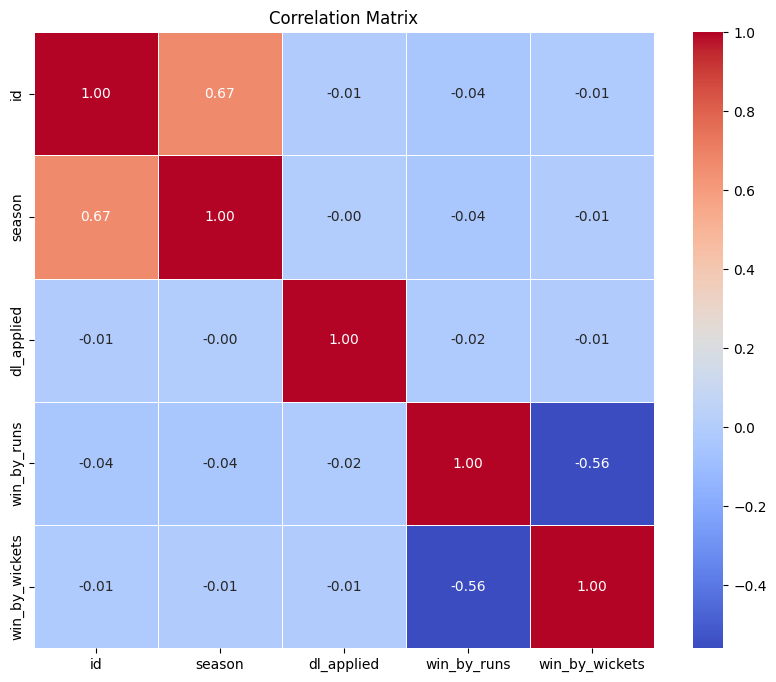

In [ ]:
# Correlation analysis
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix: ", correlation_matrix)
print()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#a. Calculate basic descriptive statistics (mean, median, mode, standard deviation, min, max, quartiles, etc.).

print("Basic Discriptive for numerical variables:")
stats = df.describe()
print(stats)

Basic Discriptive for numerical variables:
                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000


<ipython-input-17-c6d595315ba1>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='red', shade=True)


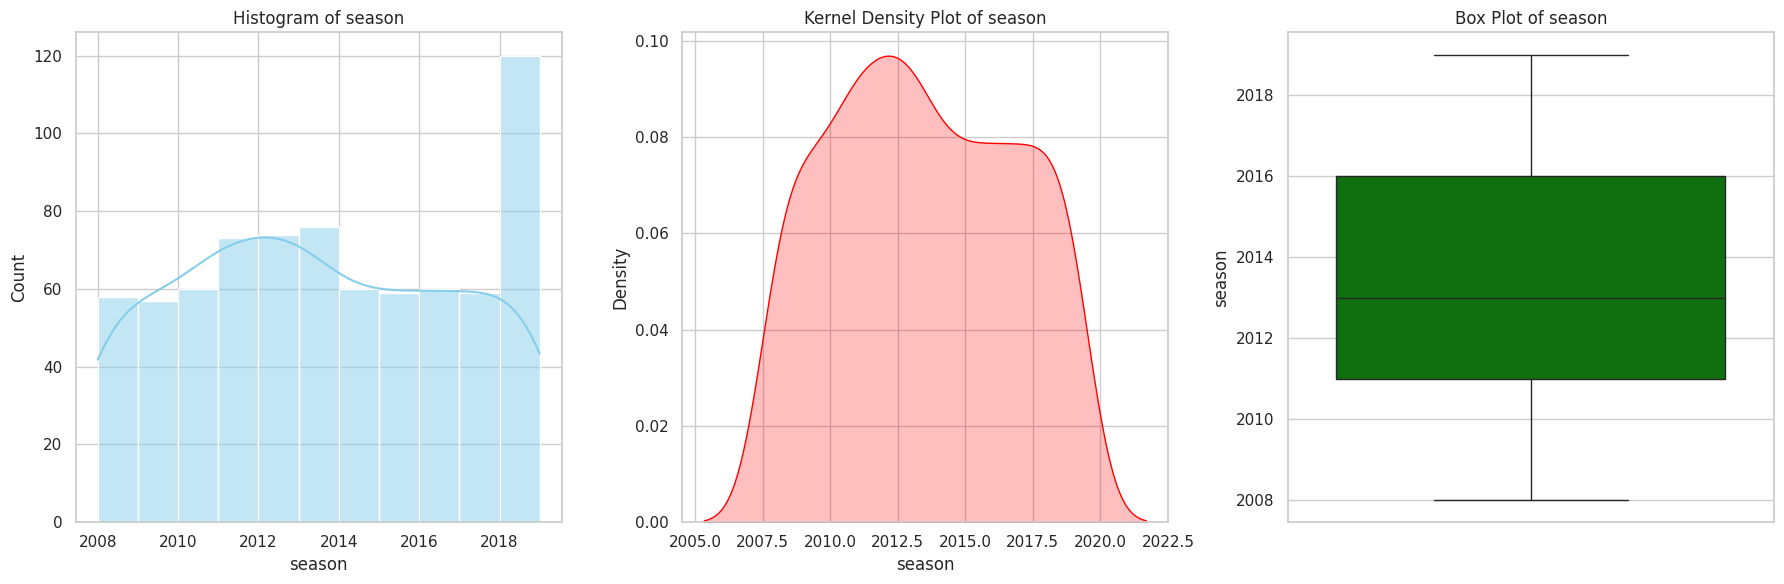

<ipython-input-17-c6d595315ba1>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='red', shade=True)


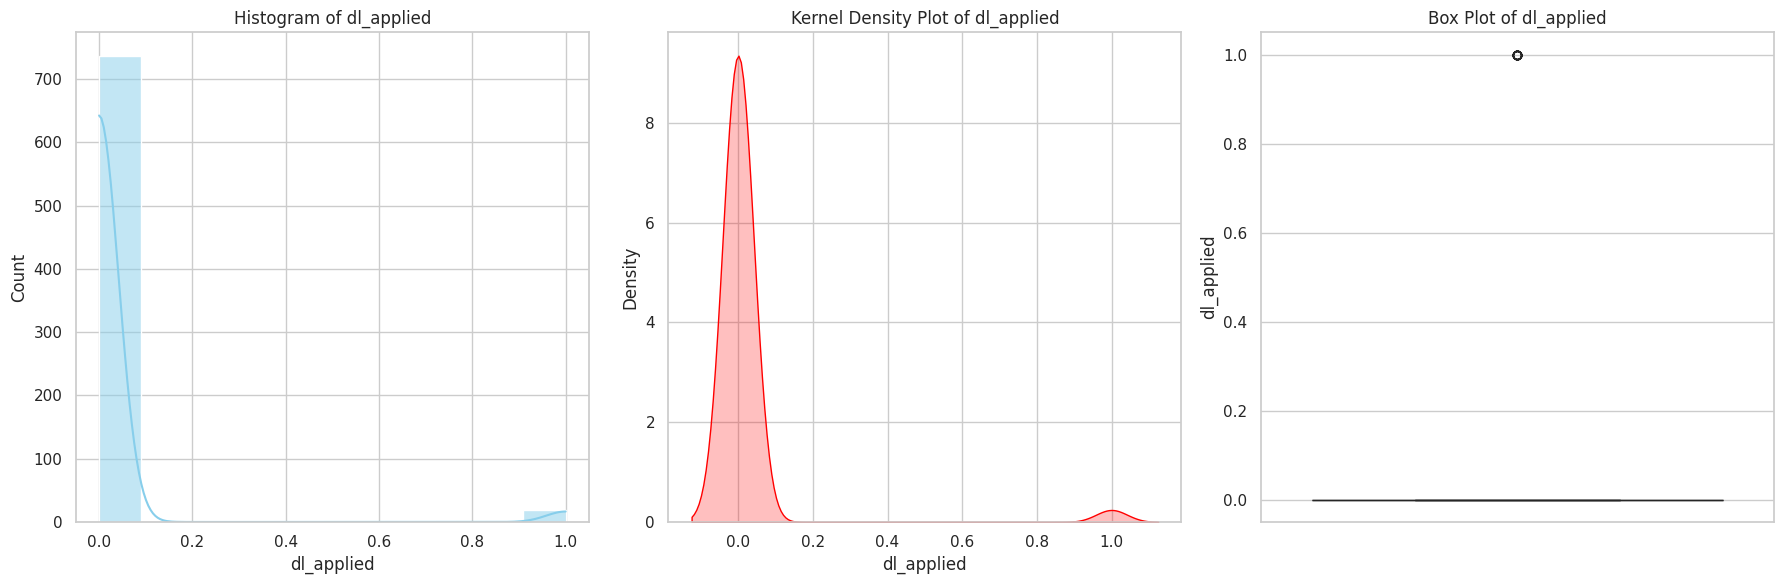

<ipython-input-17-c6d595315ba1>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='red', shade=True)


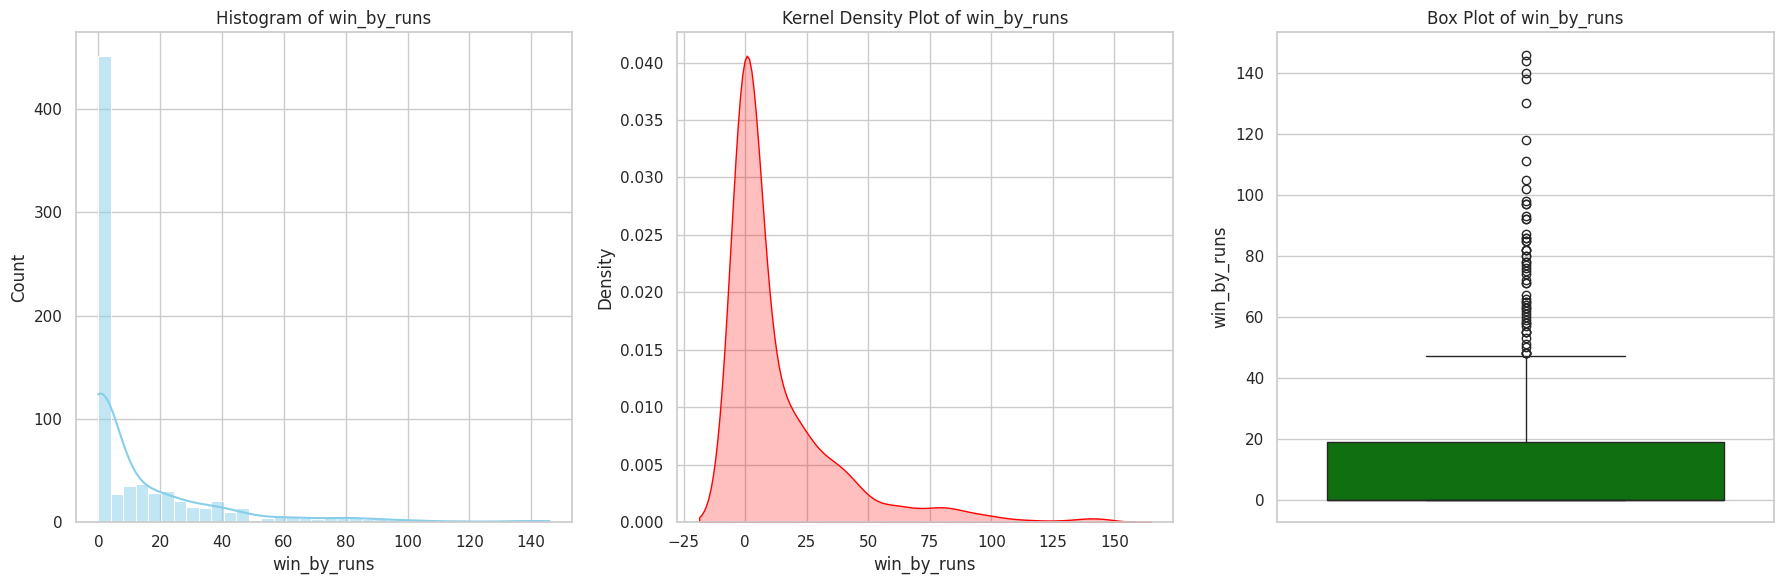

<ipython-input-17-c6d595315ba1>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='red', shade=True)


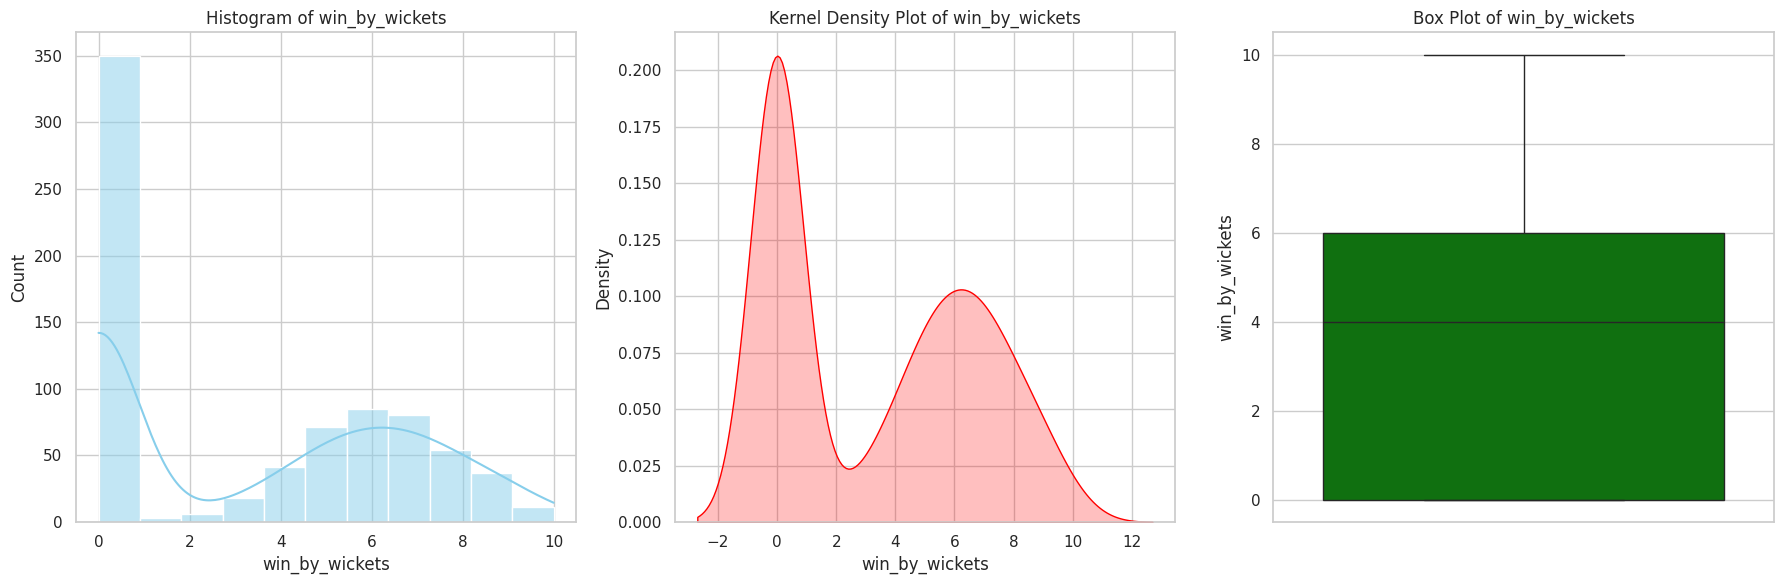

In [ ]:
#b. Visualize the distribution using histograms, kernel density plots, or box plots.

# Set the style of seaborn
sns.set(style="whitegrid")

# Select numerical columns for analysis excluding 'id' and 'player_of_match'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['id'])

# Determine the number of rows and columns for subplots
num_cols = 3
num_rows = (len(numerical_columns) // num_cols) + (len(numerical_columns) % num_cols)

# Loop through each numerical column for visualization
for column in numerical_columns:
    plt.figure(figsize=(18, 6))

    # Plot histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')

    # Plot kernel density plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(df[column], color='red', shade=True)
    plt.title(f'Kernel Density Plot of {column}')

    # Plot box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[column], color='green')
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()

In [ ]:
#a. Display frequency tables showing counts and percentages.

# Select categorical columns for analysis
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column for analysis
for column in categorical_columns:
    print(f"Frequency table for {column}:")
    # Count occurrences of each category
    counts = df[column].value_counts()
    # Calculate percentages
    percentages = (counts / len(df)) * 100
    # Concatenate counts and percentages into a single DataFrame
    frequency_table = pd.concat([counts, percentages], axis=1)
    frequency_table.columns = ['Count', 'Percentage']
    print(frequency_table)
    print("\n")

Frequency table for city:
                Count  Percentage
Mumbai            101   13.359788
Kolkata            77   10.185185
Delhi              74    9.788360
Bangalore          66    8.730159
Hyderabad          64    8.465608
Chennai            57    7.539683
Jaipur             47    6.216931
Chandigarh         46    6.084656
Pune               38    5.026455
Durban             15    1.984127
Bengaluru          14    1.851852
Visakhapatnam      13    1.719577
Centurion          12    1.587302
Ahmedabad          12    1.587302
Rajkot             10    1.322751
Mohali             10    1.322751
Indore              9    1.190476
Dharamsala          9    1.190476
Johannesburg        8    1.058201
Cuttack             7    0.925926
Ranchi              7    0.925926
Port Elizabeth      7    0.925926
Cape Town           7    0.925926
Abu Dhabi           7    0.925926
Sharjah             6    0.793651
Raipur              6    0.793651
Kochi               5    0.661376
Kanpur              4 

<ipython-input-19-836e55568b6e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis', ax=ax)
<ipython-input-19-836e55568b6e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis', ax=ax)
<ipython-input-19-836e55568b6e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis', ax=ax)
<ipython-input-19-836e55568b6e>:19: FutureW

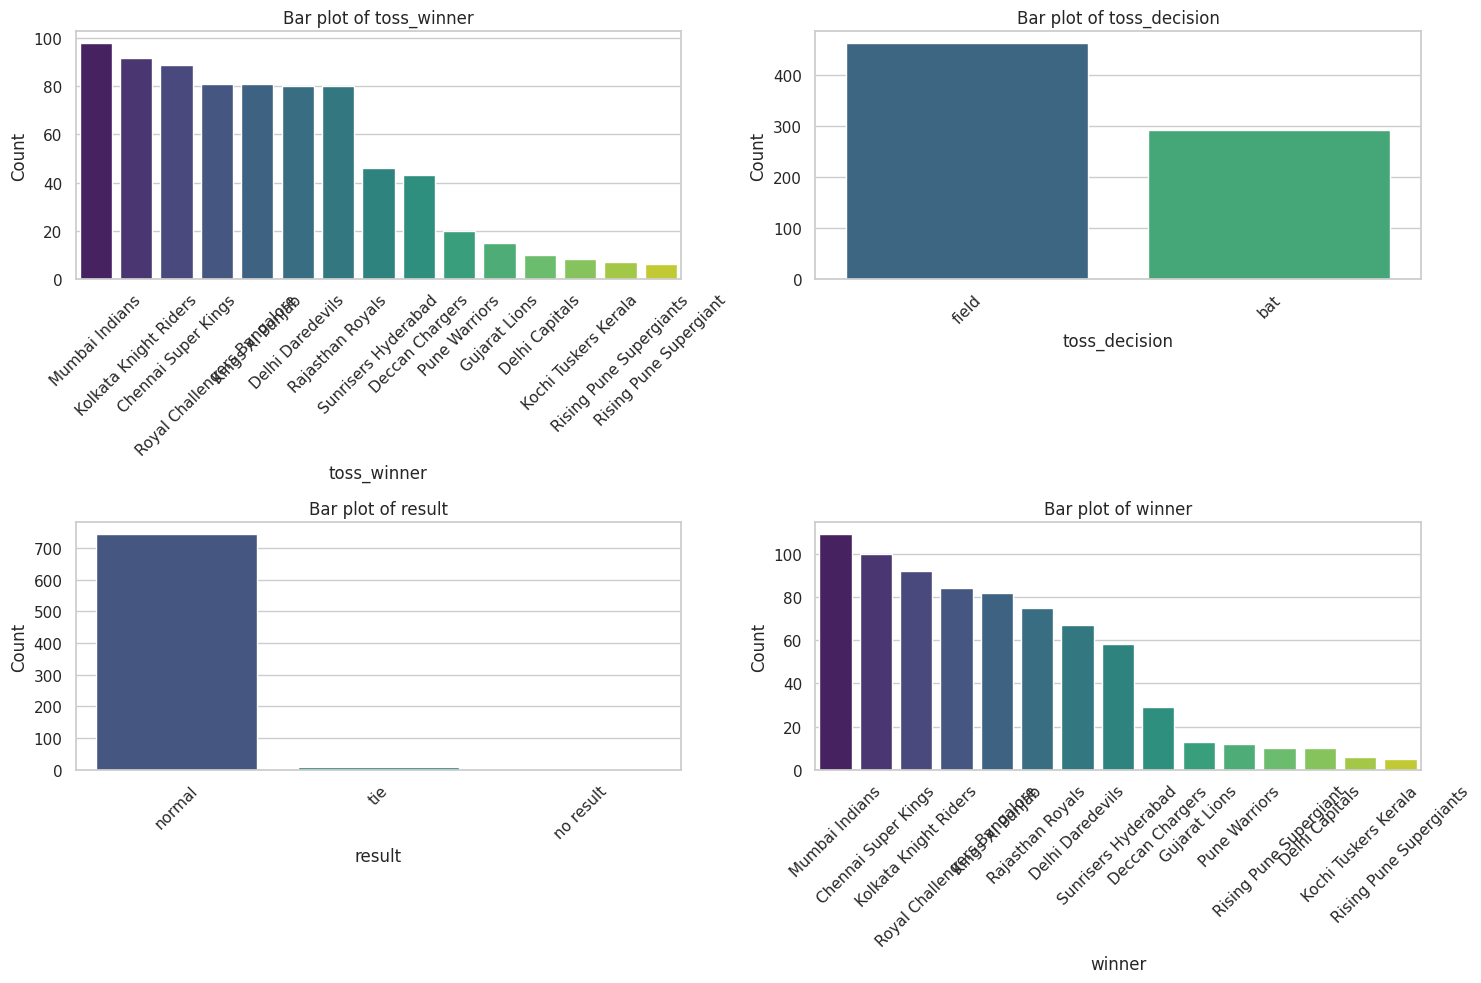

In [ ]:
#b. Visualize using bar plots.

# Select categorical columns for analysis excluding specified columns
categorical_columns = df.select_dtypes(include=['object']).columns.drop(['city', 'team1', 'team2', 'venue', 'umpire1', 'umpire2', 'umpire3', 'player_of_match'])

# Determine the number of rows and columns for subplots
num_cols = len(categorical_columns)
num_rows = (num_cols // 2) + (num_cols % 2)  # Ensure even distribution of plots

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through each categorical column for visualization
for i, column in enumerate(categorical_columns):
    ax = axes[i]  # Get the appropriate axis
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis', ax=ax)
    ax.set_title(f'Bar plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

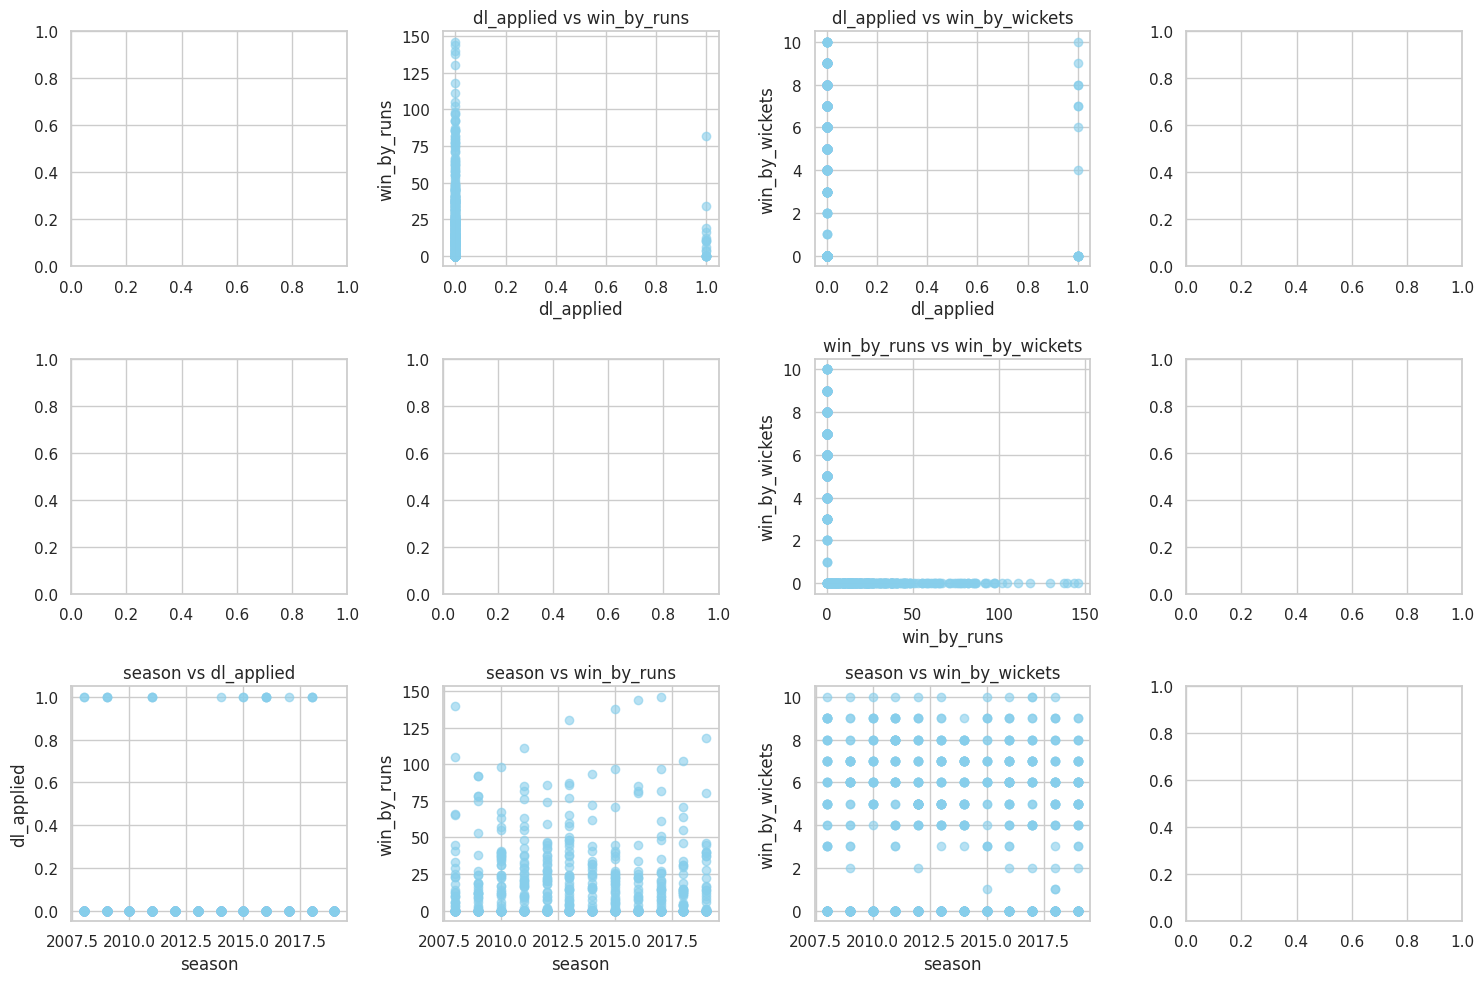

In [ ]:
#a. Explore relationships between pairs of numerical variables using scatter plots or pair plots.

# Scatter Plot
# Select numerical columns for analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['id'])

# Determine the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_rows = num_cols - 1  # Because we are excluding one variable from the analysis

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through each pair of numerical variables for scatter plot
for i in range(num_cols):
    for j in range(i+1, num_cols):
        ax = axes[i-1, j-1] if num_rows > 1 else axes[j-1]  # Adjust for multiple rows
        ax.scatter(df[numerical_columns[i]], df[numerical_columns[j]], color='skyblue', alpha=0.6)
        ax.set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
        ax.set_xlabel(numerical_columns[i])
        ax.set_ylabel(numerical_columns[j])
        ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


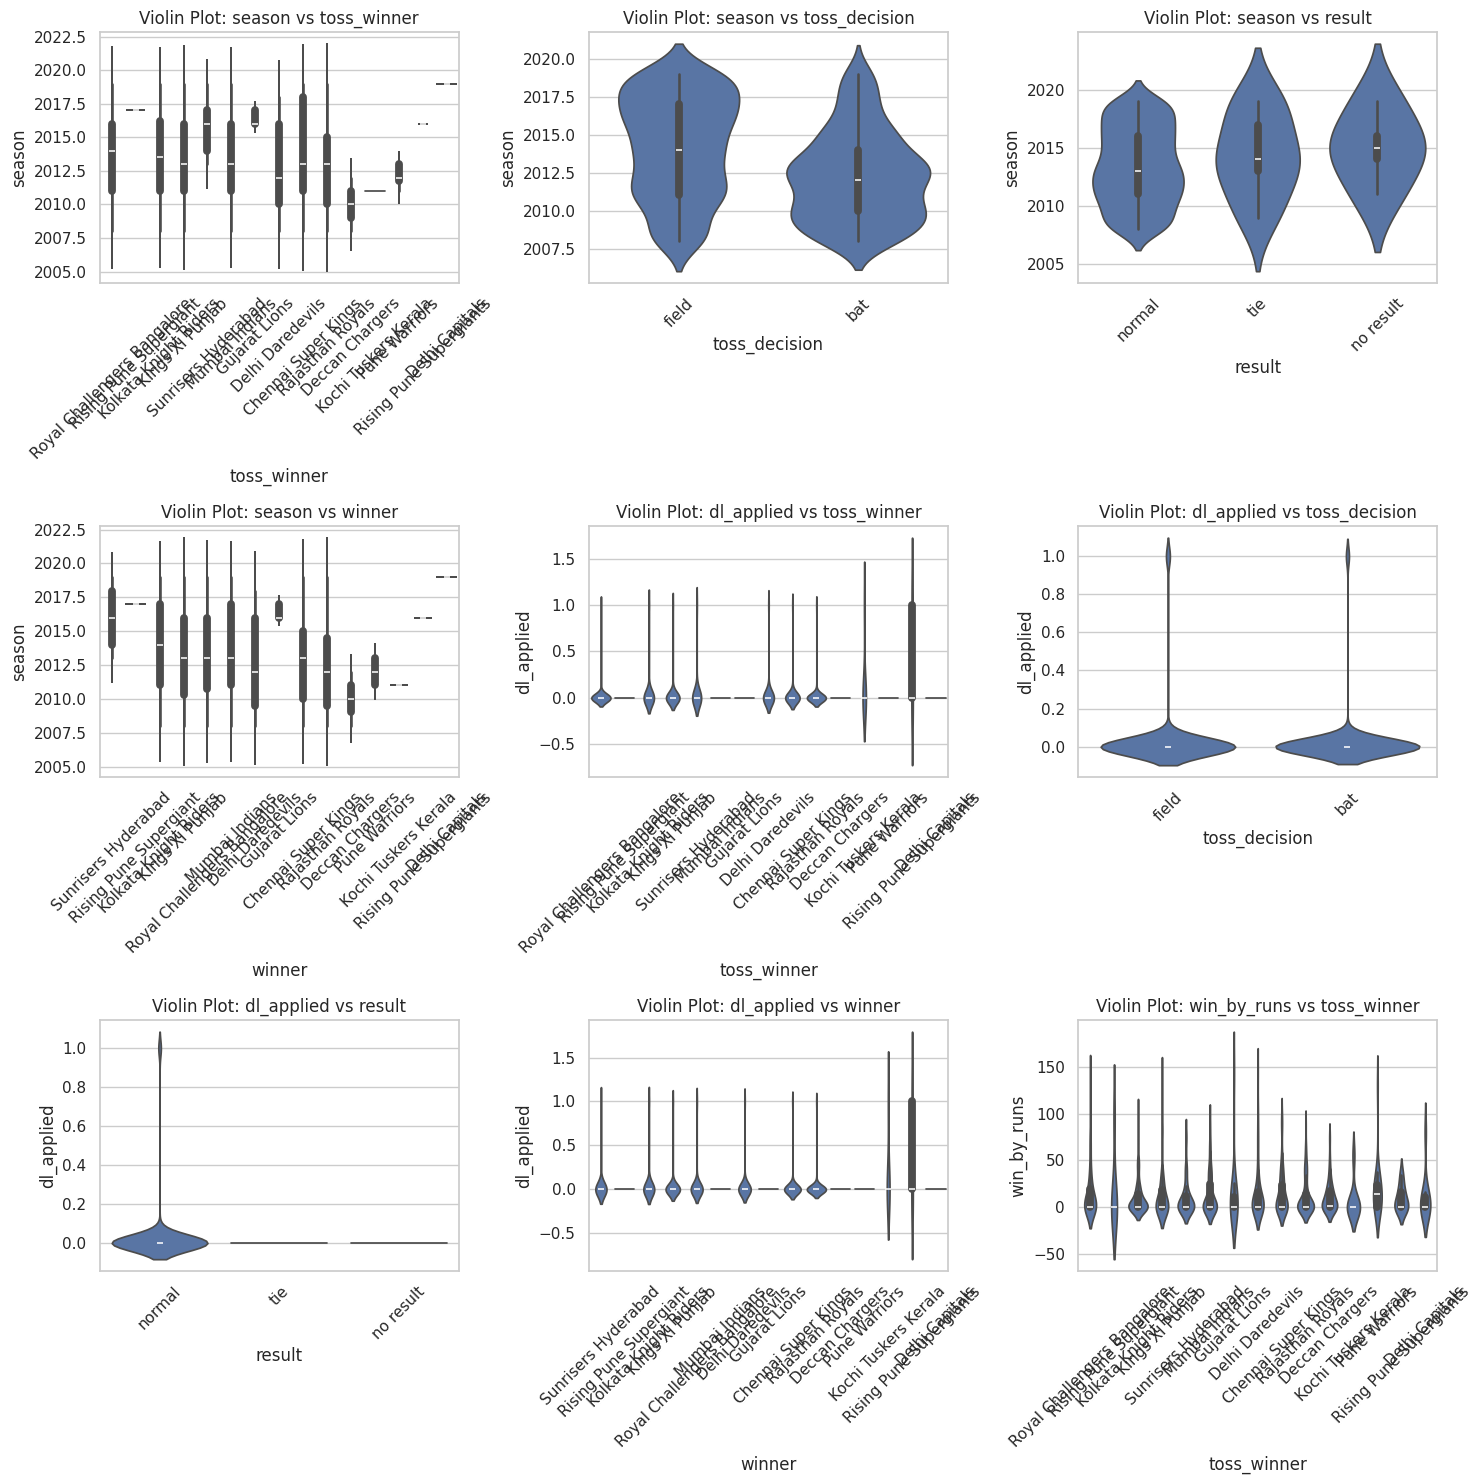

In [ ]:
# b. Explore relationships between numerical and categorical variables using box plots or violin plots.

import itertools

# Using Violin plot
# Select numerical and categorical columns for analysis excluding specified columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['id'])
categorical_columns = df.select_dtypes(include=['object']).columns.drop(['team1', 'team2', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3', 'city'])

# Determine the number of plots to display (maximum 9)
max_plots = min(9, len(numerical_columns) * len(categorical_columns))

# Create subplots
num_rows = (max_plots // 3) + (max_plots % 3 > 0)
num_cols = min(3, max_plots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each numerical variable and categorical variable for violin plot
for i, (num_col, cat_col) in enumerate(itertools.islice(itertools.product(numerical_columns, categorical_columns), max_plots)):
    ax = axes[i]
    sns.violinplot(x=df[cat_col], y=df[num_col], ax=ax)
    ax.set_title(f'Violin Plot: {num_col} vs {cat_col}')
    ax.set_xlabel(cat_col)
    ax.set_ylabel(num_col)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove any unused subplots
for i in range(max_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#c. Calculate correlation coefficients between numerical variables.

# Calculate correlation coefficients between numerical variables
correlation_matrix = df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      id    season  dl_applied  win_by_runs  win_by_wickets
id              1.000000  0.668304   -0.011658    -0.039403       -0.012239
season          0.668304  1.000000   -0.001116    -0.037529       -0.009379
dl_applied     -0.011658 -0.001116    1.000000    -0.016349       -0.011631
win_by_runs    -0.039403 -0.037529   -0.016349     1.000000       -0.560420
win_by_wickets -0.012239 -0.009379   -0.011631    -0.560420        1.000000


<ipython-input-22-eb35002b70dc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
df_drop = df.drop(labels=['id'],axis=1)
df_drop.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


You are tasked with implementing Multi-Dimensional Scaling (MDS) to analyze and
visualize the structure of a dataset containing pairwise dissimilarities or distances between a
set of objects. Your goal is to reduce the dimensionality of the dataset while preserving the
pairwise distances as much as possible.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


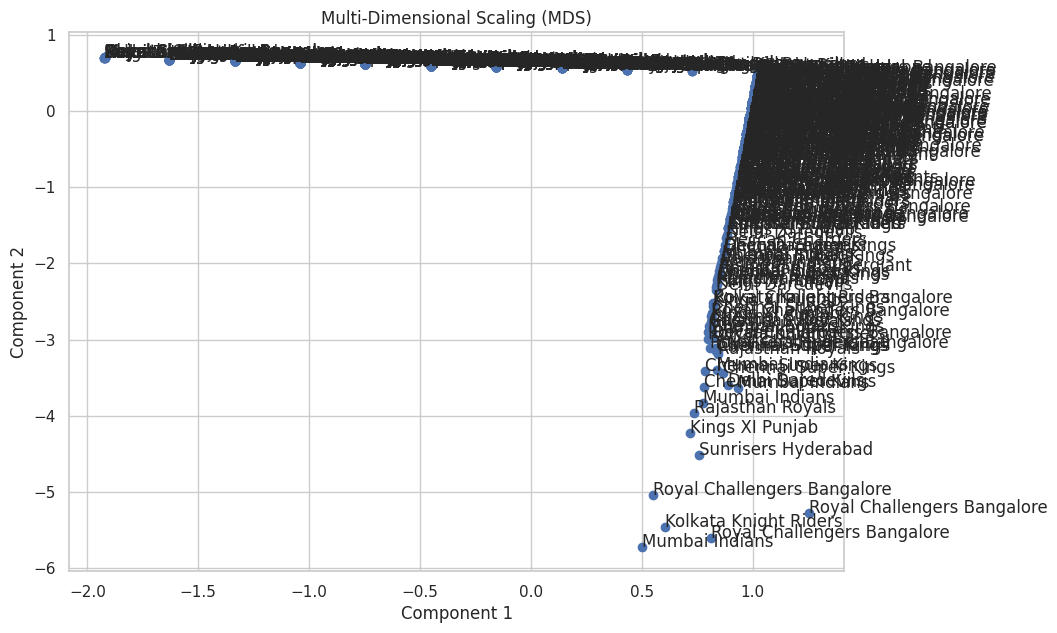

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/matches.csv")

# Drop non-numeric columns like 'id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
# 'result', 'dl_applied', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3'
data_numeric = data.drop(columns=['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
                                   'result', 'dl_applied', 'winner', 'player_of_match', 'venue', 'umpire1',
                                   'umpire2', 'umpire3'])

# Standardize the numeric features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Compute pairwise Euclidean distances
dissimilarities = pairwise_distances(data_scaled, metric='euclidean')

# Apply Multi-Dimensional Scaling (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed')
X_mds = mds.fit_transform(dissimilarities)

# Visualize the MDS results
plt.figure(figsize=(10, 7))
plt.scatter(X_mds[:, 0], X_mds[:, 1])

# Annotate points with team names or any other relevant information
for i, txt in enumerate(data['winner']):
    plt.annotate(txt, (X_mds[i, 0], X_mds[i, 1]))

plt.title('Multi-Dimensional Scaling (MDS)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


Implement Multi-Dimensional Scaling (MDS) using the sklearn.manifold.MDS module to
reduce the dimensionality of the dataset to k dimensions, where k is a user-defined parameter.
Visualize the objects in a k-dimensional scatter plot based on the MDS results. Each point on
the plot represents an object, and the position of the points should reflect their relative
similarities or dissimilarities as accurately as possible. Provide appropriate labels for the
objects on the scatter plot to make it clear which point corresponds to which object.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


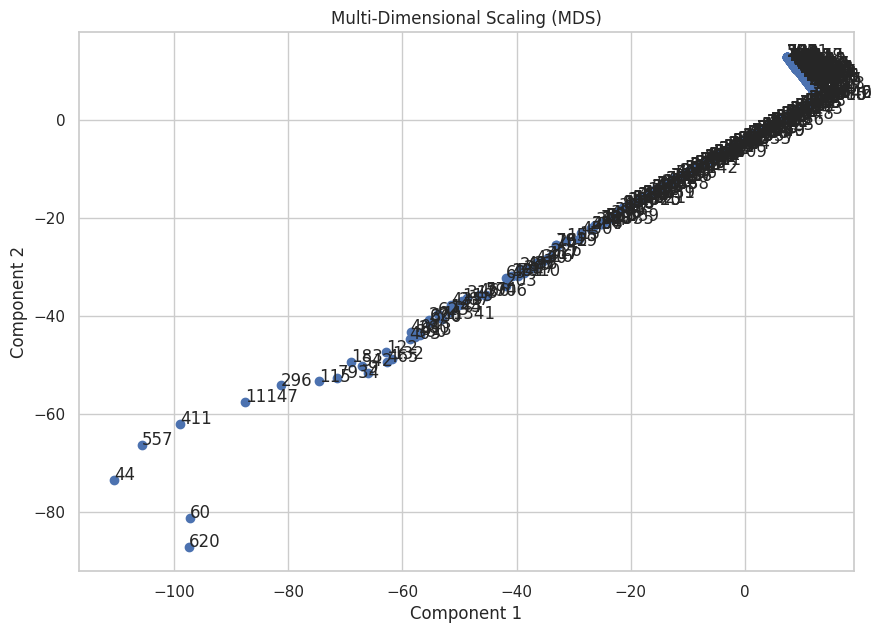

In [ ]:
import pandas as pd
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/matches.csv")

# Drop non-numeric columns and irrelevant columns
data_numeric = data.drop(columns=['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
                                  'result', 'dl_applied', 'winner', 'player_of_match', 'venue', 'umpire1',
                                  'umpire2', 'umpire3'])

# Compute pairwise dissimilarities using Euclidean distance
dissimilarities = pairwise_distances(data_numeric, metric='euclidean')

# Define the number of dimensions for MDS
k = 2  # You can change this to any value you want

# Apply Multi-Dimensional Scaling (MDS) to reduce the dimensionality
mds = MDS(n_components=k, dissimilarity='precomputed')
X_mds = mds.fit_transform(dissimilarities)

# Visualize the objects in a k-dimensional scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X_mds[:, 0], X_mds[:, 1])

# Add labels for the objects
for i, txt in enumerate(data['id']):
    plt.annotate(txt, (X_mds[i, 0], X_mds[i, 1]))

plt.title('Multi-Dimensional Scaling (MDS)')
plt.xlabel(f'Component 1')
plt.ylabel(f'Component 2')
plt.grid(True)
plt.show()


Use Python and any necessary libraries for data manipulation, dimensionality reduction, and
visualization. Ensure that your code is flexible and can handle datasets of varying sizes and
dimensions. Allow the user to specify the number of dimensions k for the MDS algorithm.
Include comments where necessary to explain your approach and any important steps. Test
your code with synthetic datasets of different sizes and dimensions to ensure its robustness
and efficiency.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


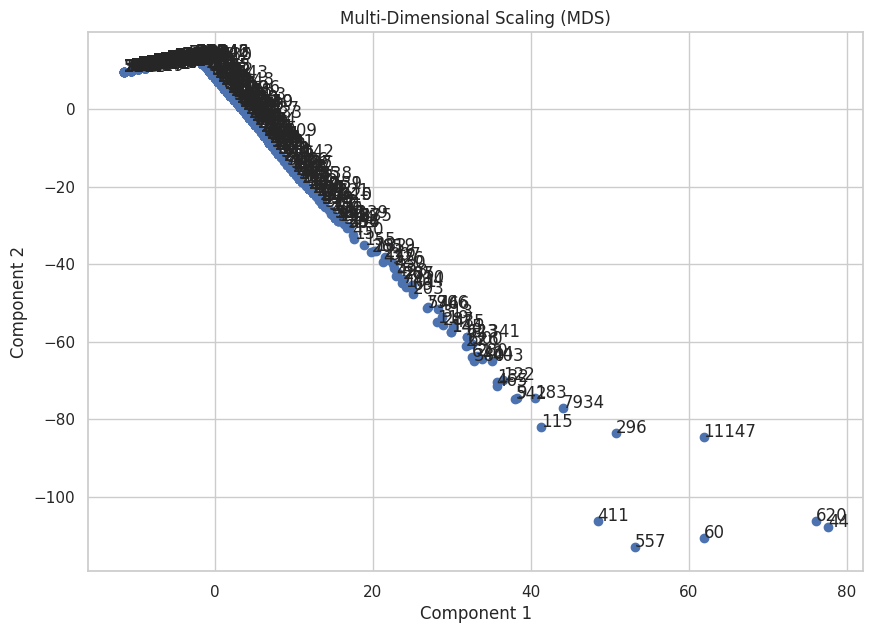

In [ ]:
import pandas as pd
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def perform_mds(data, k):
    """
    Perform Multi-Dimensional Scaling (MDS) on the given dataset.

    Args:
    - data: DataFrame containing the dataset
    - k: Number of dimensions for MDS

    Returns:
    - X_mds: Reduced-dimensional representation of the dataset using MDS
    """
    # Compute pairwise dissimilarities using Euclidean distance
    dissimilarities = pairwise_distances(data, metric='euclidean')

    # Apply Multi-Dimensional Scaling (MDS) to reduce the dimensionality
    mds = MDS(n_components=k, dissimilarity='precomputed')
    X_mds = mds.fit_transform(dissimilarities)

    return X_mds

def visualize_mds(X_mds, labels):
    """
    Visualize the Multi-Dimensional Scaling (MDS) results.

    Args:
    - X_mds: Reduced-dimensional representation of the dataset using MDS
    - labels: List of labels for the objects
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(X_mds[:, 0], X_mds[:, 1])

    # Add labels for the objects
    for i, txt in enumerate(labels):
        plt.annotate(txt, (X_mds[i, 0], X_mds[i, 1]))

    plt.title('Multi-Dimensional Scaling (MDS)')
    plt.xlabel(f'Component 1')
    plt.ylabel(f'Component 2')
    plt.grid(True)
    plt.show()

def main():
    # Load the dataset (replace 'your_dataset.csv' with the actual path)
    data = pd.read_csv("/content/matches.csv")

    # Extract features from the dataset
    features = data.drop(columns=['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
                                   'result', 'dl_applied', 'winner', 'player_of_match', 'venue', 'umpire1',
                                   'umpire2', 'umpire3'])

    # Specify the number of dimensions (k) for MDS
    k = 2

    # Perform Multi-Dimensional Scaling (MDS)
    X_mds = perform_mds(features, k)

    # Visualize the MDS results
    visualize_mds(X_mds, data['id'])

if __name__ == "__main__":
    main()
